# Plots y visualizacion de datos

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

mainpath = "D:/Tutoriales/DataScience-Udemy/resources/python-ml-course/datasets/"
filename = "customer-churn-model/Customer Churn Model.txt"
fullpath = os.path.join(mainpath, filename)
fullpath

'D:/Tutoriales/DataScience-Udemy/resources/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt'

In [2]:
df = pd.read_csv(fullpath)
df.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [7]:
%matplotlib inline

## Scatter plot
+ Este grafico de dispersion nos puede dar una idea de como los datos estan relacionados entre si (covarianza y/o correlacion)
+ Nos puede indicar si es que esta relacion es lineal algunos algoritmos que podrian emplearse

<Axes: xlabel='Day Mins', ylabel='Day Charge'>

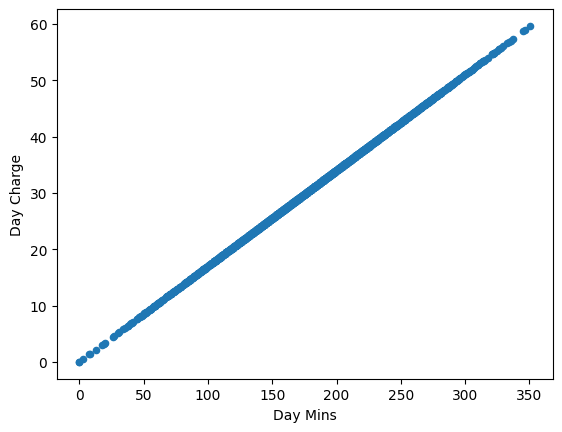

In [8]:
df.plot(kind = "scatter", x = "Day Mins", y = "Day Charge")

<Axes: xlabel='Night Mins', ylabel='Night Charge'>

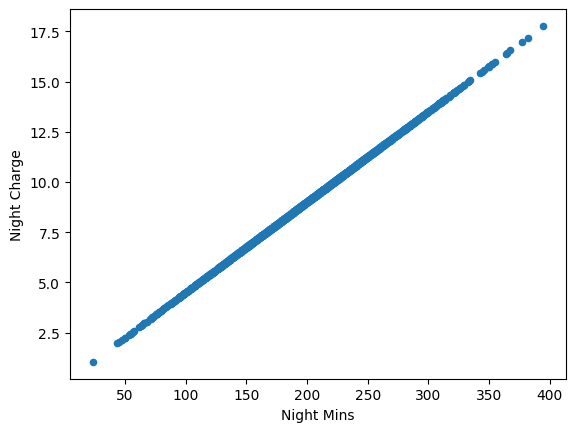

In [10]:
df.plot(kind = "scatter", x = "Night Mins", y = "Night Charge")

<Axes: xlabel='Night Calls', ylabel='Night Charge'>

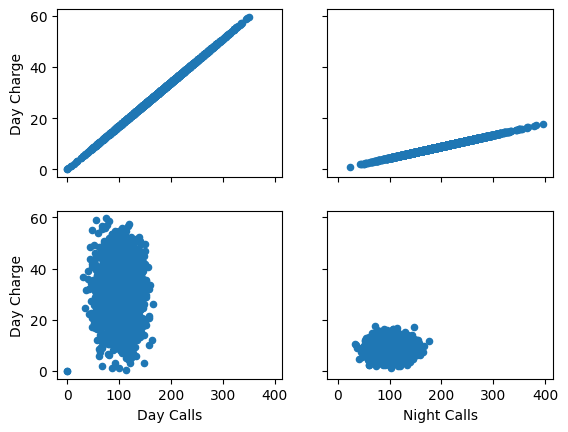

In [11]:
figure, axs = plt.subplots(2,2, sharex=True, sharey=True)
df.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
df.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
df.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
df.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

Podemos observar como la cantidad de minutos activos y la carga estan relacionados de forma lineal tanto el dia como la noche, pero la cantidad de llamadas y la carga no parecen tener relacion alguna

## Histograma de frecuencia
+ Esta representacion unidimensional nos dara una idea de la forma en la que se distribuye una caracteristica, dandonos caracteristicas segun su tipo de dist.
+ En el caso de una dist. normal nos daria indicios de su media, std, var, cov, etc.

<Axes: ylabel='Frequency'>

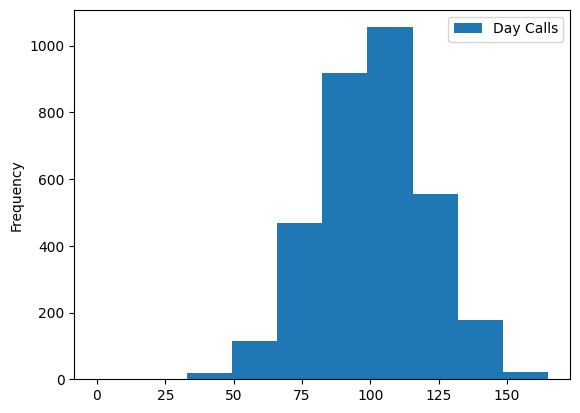

In [14]:
df.plot(kind="hist", y="Day Calls")

array([[<Axes: title={'center': 'Night Calls'}>]], dtype=object)

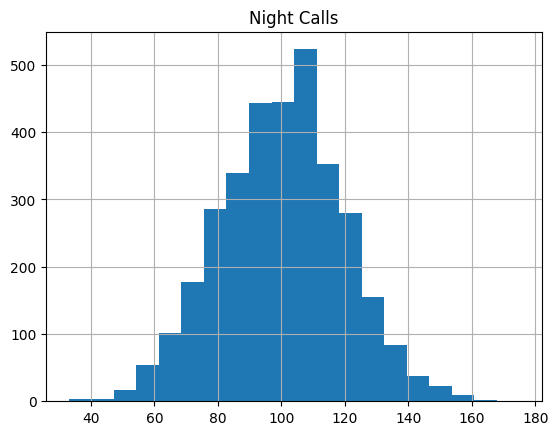

In [16]:
df.hist(column="Night Calls", bins=20)

Text(0.5, 1.0, 'Histograma de Carga Diurna')

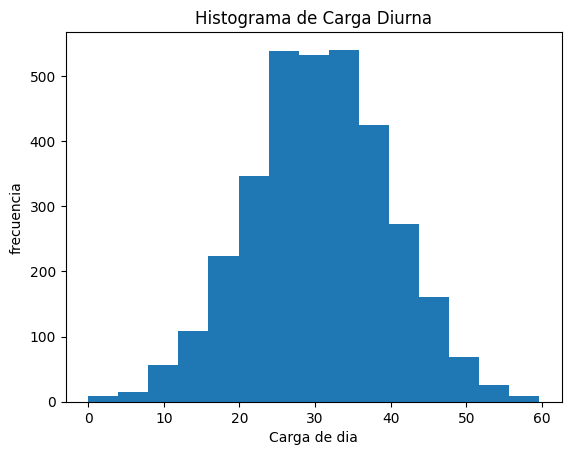

In [19]:
plt.hist(x=df["Day Charge"],bins=15)
plt.xlabel("Carga de dia")
plt.ylabel("frecuencia")
plt.title("Histograma de Carga Diurna")

13


Text(0.5, 1.0, 'Histograma de Llamadas Diurna')

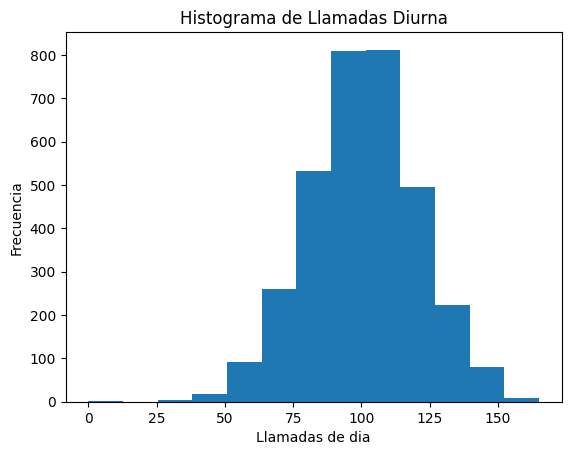

In [27]:
# Calculando el numero de divisiones o binds por la regla de sturges
M = df.shape[0]
c = int(np.ceil(1 + np.log2(M)))
print(c)

plt.hist(x=df["Day Calls"],bins=c)
plt.xlabel("Llamadas de dia")
plt.ylabel("Frecuencia")
plt.title("Histograma de Llamadas Diurna")

## Boxplot, diagrama de caja y bigotes
+ Entrega la distribucion de variables cuantitativas, de una forma mejor que el histograma.
+ En la caja podemos encontrar en percentiles los datos entre el percentil 25 y el 75, es decir contiene el 50% de los datos donde la linea del medio es su mediana o percentil 50 (valor medio), este rango se conoce como rango intercuartilico o IQR.
+ Los valores de los "bigotes" o lineas fuera de la caja se colocan tipicamente a 1.5 veces el IQR.
+ Las muestras fuera de este rango se muestran como puntos los cuales se pueden considerar Outliers.


Text(0.5, 1.0, 'Boxplot de llamadas diurnas')

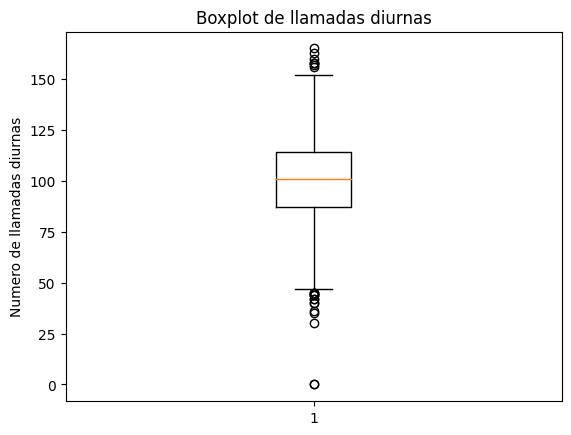

In [28]:
plt.boxplot(df["Day Calls"])
plt.ylabel("Numero de llamadas diurnas")
plt.title("Boxplot de llamadas diurnas")

In [29]:
df["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64